Imporing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

Building a baseline model of different layers with different activation functions

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(68, input_dim=68, activation='sigmoid'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Converting Categorical variables to numerical values

In [ ]:
df=pd.read_excel("input.xlsx")
df=pd.get_dummies(df)
df=df.astype(float)

Scaling the features 

In [ ]:

Y=df["cost_per_click"]
X=df.drop("cost_per_click",axis=1)
X=preprocessing.scale(X)


Using Keras deeplearning regression model

In [ ]:
np.random.seed(420)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=25, batch_size=50, verbose=0)
estimators = []

In [ ]:
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=25, batch_size=50, verbose=0)))
pipeline = Pipeline(estimators)

keeping the errors in an array with different vfold validations

In [ ]:
errors=[]
for i in range(2,11):
    kfold = KFold(n_splits=i, random_state=420)
    results = cross_val_score(pipeline, X, Y, cv=kfold)
    errors.append(results.mean())

Plotting the errors for different vfold validations


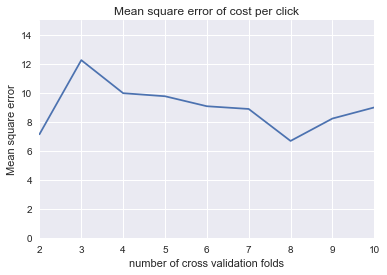

In [25]:
validation=np.arange(2,11)
sns.set()
plt.plot(validation,errors)
plt.xlim(xmin=2,xmax=10)
plt.ylim(ymin=0,ymax=15)
plt.xlabel("number of cross validation folds")
plt.ylabel("Mean square error")
plt.title("Mean square error of cost per click")
plt.show()

As we can observe that Mean Square Error for 8 fold validations is lesser